<a href="https://colab.research.google.com/github/niruthikka24/DataStorm-3.0/blob/main/Time_Series_Plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
import pandas as pd
import numpy as np

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from xgboost import XGBRegressor
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import make_scorer
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
up = files.upload()

Saving validnonpromopred.csv to validnonpromopred.csv
Saving validpred.csv to validpred.csv
Saving validpromopred.csv to validpromopred.csv


In [ ]:
up2 = files.upload()

Saving preprocessed_sellingprice.csv to preprocessed_sellingprice.csv


In [ ]:
df = pd.read_csv('preprocessed_sellingprice.csv')
df.head()

,ItemCode,Period,Week_Number,startdate,enddate,Category,WeeklySales,OnPromo,OriginalSellingPrice,SellingPrice
0,1071115,2021-12-17/2021-12-23,51,2021-12-17,2021-12-23,2,2,0,0,0.0
1,210652,2022-02-11/2022-02-17,7,2022-02-11,2022-02-17,4,8,0,0,0.0
2,877624,2021-12-17/2021-12-23,51,2021-12-17,2021-12-23,2,32,0,0,0.0
3,371104,2021-12-17/2021-12-23,51,2021-12-17,2021-12-23,1,11,0,0,0.0
4,1090294,2021-12-17/2021-12-23,51,2021-12-17,2021-12-23,1,14,0,0,0.0


In [ ]:
df['startdate'] = pd.to_datetime(df['startdate'])
df['enddate'] = pd.to_datetime(df['enddate'])

In [ ]:
df.loc[(df['Category']==1) & ((df['OnPromo']==1) | (df['OnPromo']==0))].sort_values('ItemCode')

,ItemCode,Period,Week_Number,startdate,enddate,Category,WeeklySales,OnPromo,OriginalSellingPrice,SellingPrice
1464,3418,2022-01-07/2022-01-13,2,2022-01-07,2022-01-13,1,82,0,0,0.0
2740,3418,2021-12-10/2021-12-16,50,2021-12-10,2021-12-16,1,98,0,0,0.0
612,3418,2021-11-12/2021-11-18,46,2021-11-12,2021-11-18,1,50,0,0,0.0
1141,3418,2022-01-28/2022-02-03,5,2022-01-28,2022-02-03,1,103,0,0,0.0
1970,3418,2021-10-15/2021-10-21,42,2021-10-15,2021-10-21,1,49,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...
3597,1090303,2021-11-26/2021-12-02,48,2021-11-26,2021-12-02,1,9,0,0,0.0
3574,1090303,2021-12-24/2021-12-30,52,2021-12-24,2021-12-30,1,9,0,0,0.0
1728,1090303,2021-12-03/2021-12-09,49,2021-12-03,2021-12-09,1,4,0,0,0.0
645,1090303,2021-12-31/2022-01-06,1,2021-12-31,2022-01-06,1,2,0,0,0.0


In [ ]:
#selecting item 3418 belonging to category 1 and not having promotions
item1 = df.loc[df['ItemCode']==3418]
item1 = item1.sort_values('startdate')
# item1

In [ ]:
# item1 = item1.set_index("startdate")

In [ ]:
item1.head()

,ItemCode,Period,Week_Number,startdate,enddate,Category,WeeklySales,OnPromo,OriginalSellingPrice,SellingPrice
3122,3418,2021-10-01/2021-10-07,40,2021-10-01,2021-10-07,1,45,0,0,0.0
3482,3418,2021-10-08/2021-10-14,41,2021-10-08,2021-10-14,1,50,0,0,0.0
1970,3418,2021-10-15/2021-10-21,42,2021-10-15,2021-10-21,1,49,0,0,0.0
788,3418,2021-10-22/2021-10-28,43,2021-10-22,2021-10-28,1,38,0,0,0.0
2921,3418,2021-10-29/2021-11-04,44,2021-10-29,2021-11-04,1,53,0,0,0.0


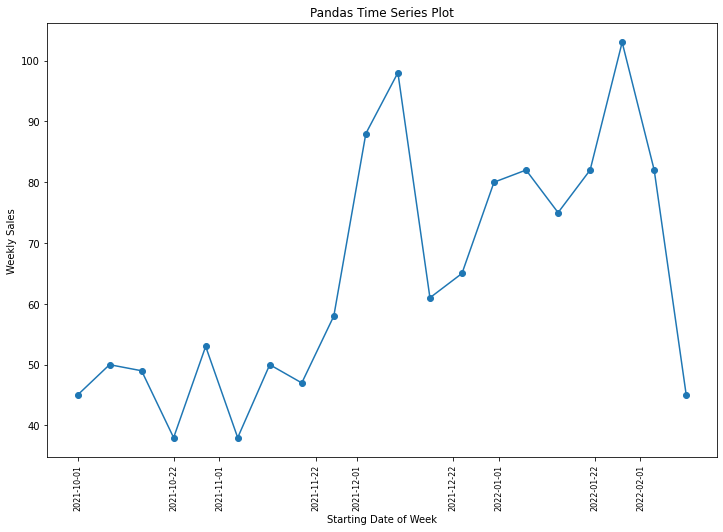

In [ ]:
fig = plt.figure(figsize=(12, 8))

plt.plot(item1["WeeklySales"], marker='o')

# Labelling 

plt.xlabel("Starting Date of Week")
plt.ylabel("Weekly Sales")
plt.title("Pandas Time Series Plot")
plt.tick_params(axis='x',labelsize=8,rotation=90)

# Display

plt.show()

In [ ]:
item2 = df.loc[df['ItemCode']==9925]
item2 = item2.sort_values('startdate')
# item2

In [ ]:
# item2 = item2.set_index("startdate")

In [ ]:
item2.head()

,ItemCode,Period,Week_Number,startdate,enddate,Category,WeeklySales,OnPromo,OriginalSellingPrice,SellingPrice
3368,9925,2021-10-01/2021-10-07,40,2021-10-01,2021-10-07,2,7,0,0,0.0
3704,9925,2021-10-08/2021-10-14,41,2021-10-08,2021-10-14,2,12,0,0,0.0
3102,9925,2021-10-15/2021-10-21,42,2021-10-15,2021-10-21,2,12,0,0,0.0
742,9925,2021-10-22/2021-10-28,43,2021-10-22,2021-10-28,2,5,0,0,0.0
3040,9925,2021-10-29/2021-11-04,44,2021-10-29,2021-11-04,2,12,0,0,0.0


In [ ]:
item3 = df.loc[df['ItemCode']==7666]
item3 = item3.sort_values('startdate')
item4 = df.loc[df['ItemCode']==23200]
item4 = item4.sort_values('startdate')

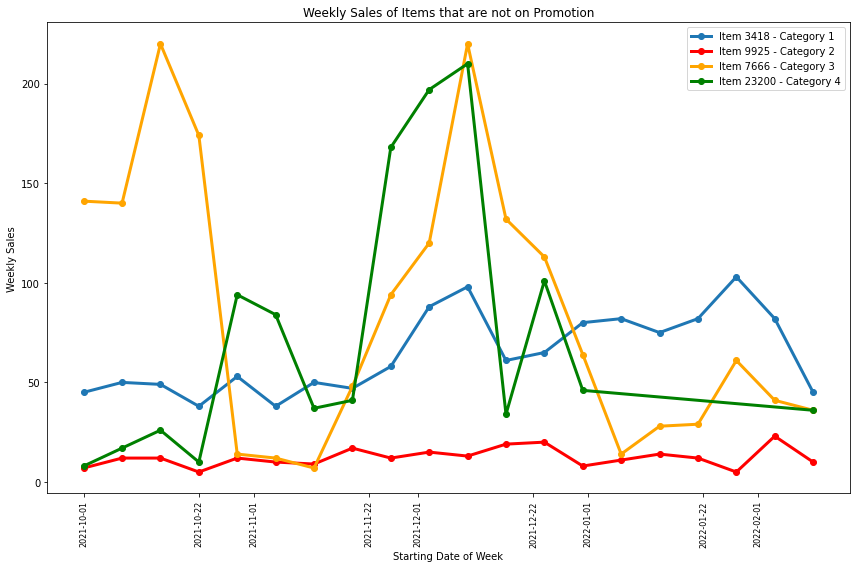

In [ ]:
fig = plt.figure(figsize=(12, 8))

plt.plot(item1.startdate, item1.WeeklySales, label='Item 3418 - Category 1', 
         linewidth=3, marker='o')
plt.plot(item2.startdate, item2.WeeklySales, color='red', 
         label='Item 9925 - Category 2', linewidth=3, marker='o')
plt.plot(item3.startdate, item3.WeeklySales, color='orange', 
         label='Item 7666 - Category 3', linewidth=3, marker='o')
plt.plot(item4.startdate, item4.WeeklySales, color='green', 
         label='Item 23200 - Category 4', linewidth=3, marker='o')

# Add title and labels

plt.title('Weekly Sales of Items that are not on Promotion')
plt.xlabel('Starting Date of Week')
plt.ylabel('Weekly Sales')

plt.tick_params(axis='x',labelsize=8,rotation=90)

# Add legend

plt.legend()

# Auto space

plt.tight_layout()

# Display plot

plt.show() 

In [ ]:
common1 = df.loc[df['Category']==1]
common1.head()

,ItemCode,Period,Week_Number,startdate,enddate,Category,WeeklySales,OnPromo,OriginalSellingPrice,SellingPrice
3,371104,2021-12-17/2021-12-23,51,2021-12-17,2021-12-23,1,11,0,0,0.0
4,1090294,2021-12-17/2021-12-23,51,2021-12-17,2021-12-23,1,14,0,0,0.0
5,145330,2021-12-17/2021-12-23,51,2021-12-17,2021-12-23,1,21,0,0,0.0
9,76399,2021-12-17/2021-12-23,51,2021-12-17,2021-12-23,1,50,0,0,0.0
18,1032532,2022-02-11/2022-02-17,7,2022-02-11,2022-02-17,1,142,0,0,0.0


In [ ]:
common1x = common1.drop(['Period','Week_Number','startdate','enddate','Category','WeeklySales','OriginalSellingPrice','SellingPrice'],axis=1)
common1x = common1x.drop_duplicates()
common1x.sort_values('ItemCode')

,ItemCode,OnPromo
41,3418,0
107,3427,0
697,17287,0
99,17287,1
93,17296,0
...,...,...
34,1085749,1
43,1090105,0
340,1090114,0
4,1090294,0


In [ ]:
common2 = df.loc[df['Category']==2]
common2x = common2.drop(['Period','Week_Number','startdate','enddate','Category','WeeklySales','OriginalSellingPrice','SellingPrice'],axis=1)
common2x = common2x.drop_duplicates()
common2x.sort_values('ItemCode')

,ItemCode,OnPromo
175,9925,0
1022,20824,1
112,20824,0
611,23569,1
17,23569,0
...,...,...
194,1101769,0
108,1103056,0
172,1105009,0
182,1105018,0


In [ ]:
def npplot(itemcode,category):

  df0 = df.loc[(df['ItemCode'] == itemcode) & (df['OnPromo']==0)]
  df1 = df.loc[(df['ItemCode'] == itemcode) & (df['OnPromo']==1)]
  df0 = df0.sort_values('startdate')
  df1 = df1.sort_values('startdate')

  fig = plt.figure(figsize=(8,5))

  plt.plot(df0.startdate, df0.WeeklySales, label='No Promotion', 
          linewidth=3, marker='o')
  plt.plot(df1.startdate, df1.WeeklySales, color='red', 
          label='Promotion', linewidth=3, marker='o')

  plt.title('Weekly Sales of Item ' + str(itemcode) + ' - Category ' + str(category))
  plt.xlabel('Starting Date of Week')
  plt.ylabel('Weekly Sales')

  plt.tick_params(axis='x',labelsize=8,rotation=90)
  plt.legend()
  plt.tight_layout()
  plt.show() 


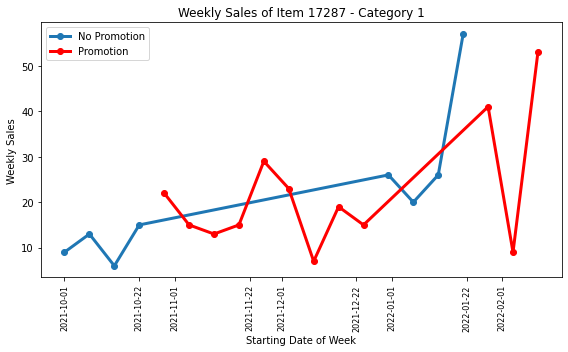

In [ ]:
npplot(17287,1)

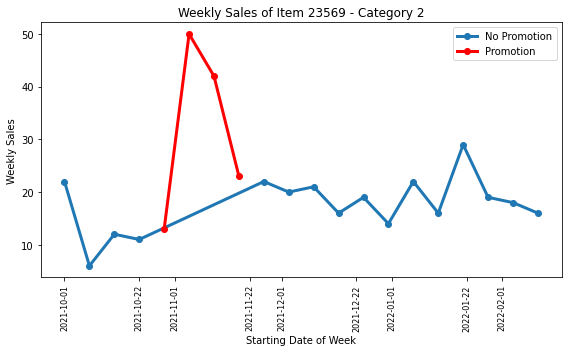

In [ ]:
npplot(23569,2)

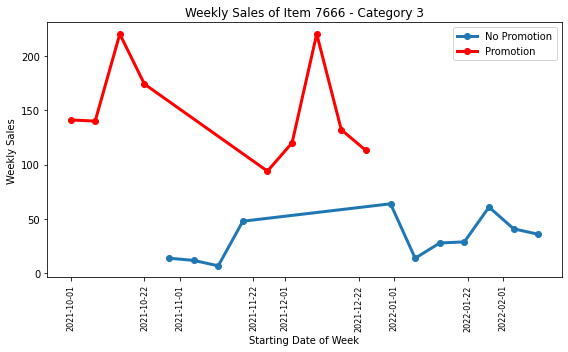

In [ ]:
npplot(7666,3)

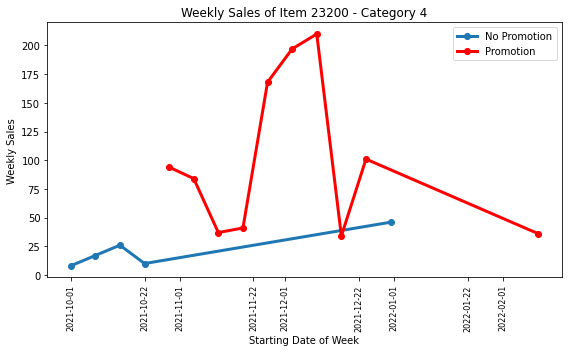

In [ ]:
npplot(23200,4)

In [ ]:
df1 = df.sort_values(['Category','Week_Number'])
df1.loc[df1['Category']==1]

,ItemCode,Period,Week_Number,startdate,enddate,Category,WeeklySales,OnPromo,OriginalSellingPrice,SellingPrice
619,1048975,2021-12-31/2022-01-06,1,2021-12-31,2022-01-06,1,13,0,0,0.0
622,38518,2021-12-31/2022-01-06,1,2021-12-31,2022-01-06,1,26,0,0,0.0
632,1032532,2021-12-31/2022-01-06,1,2021-12-31,2022-01-06,1,127,0,0,0.0
633,76399,2021-12-31/2022-01-06,1,2021-12-31,2022-01-06,1,28,0,0,0.0
637,1044682,2021-12-31/2022-01-06,1,2021-12-31,2022-01-06,1,40,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...
3592,1021264,2021-12-24/2021-12-30,52,2021-12-24,2021-12-30,1,9,0,0,0.0
3593,1090294,2021-12-24/2021-12-30,52,2021-12-24,2021-12-30,1,5,0,0,0.0
3760,43738,2021-12-24/2021-12-30,52,2021-12-24,2021-12-30,1,8,0,0,0.0
3765,416212,2021-12-24/2021-12-30,52,2021-12-24,2021-12-30,1,4,0,0,0.0


In [ ]:
df['CategoryWeeklySales']  = df.groupby(['Category','Week_Number'])['WeeklySales'].transform('sum')
df.head()

,ItemCode,Period,Week_Number,startdate,enddate,Category,WeeklySales,OnPromo,OriginalSellingPrice,SellingPrice,CategoryWeeklySales
0,1071115,2021-12-17/2021-12-23,51,2021-12-17,2021-12-23,2,2,0,0,0.0,2245
1,210652,2022-02-11/2022-02-17,7,2022-02-11,2022-02-17,4,8,0,0,0.0,1355
2,877624,2021-12-17/2021-12-23,51,2021-12-17,2021-12-23,2,32,0,0,0.0,2245
3,371104,2021-12-17/2021-12-23,51,2021-12-17,2021-12-23,1,11,0,0,0.0,3086
4,1090294,2021-12-17/2021-12-23,51,2021-12-17,2021-12-23,1,14,0,0,0.0,3086


In [ ]:
df2 = df.sort_values(['Category','Week_Number'])
df2.loc[(df2['Category']==1) & (df2['OnPromo'] == 1)]

,ItemCode,Period,Week_Number,startdate,enddate,Category,WeeklySales,OnPromo,OriginalSellingPrice,SellingPrice,CategoryWeeklySales
1293,379249,2022-01-07/2022-01-13,2,2022-01-07,2022-01-13,1,34,1,70,63.0,3089
1616,755584,2022-01-07/2022-01-13,2,2022-01-07,2022-01-13,1,50,1,70,63.0,3089
1114,755584,2022-01-14/2022-01-20,3,2022-01-14,2022-01-20,1,119,1,70,63.0,3392
1152,379249,2022-01-14/2022-01-20,3,2022-01-14,2022-01-20,1,76,1,70,63.0,3392
2357,755584,2022-01-21/2022-01-27,4,2022-01-21,2022-01-27,1,59,1,70,63.0,2401
...,...,...,...,...,...,...,...,...,...,...,...
2586,379249,2021-12-24/2021-12-30,52,2021-12-24,2021-12-30,1,126,1,70,63.0,2426
2622,1085749,2021-12-24/2021-12-30,52,2021-12-24,2021-12-30,1,12,1,70,63.0,2426
2709,755584,2021-12-24/2021-12-30,52,2021-12-24,2021-12-30,1,19,1,70,63.0,2426
2722,1048975,2021-12-24/2021-12-30,52,2021-12-24,2021-12-30,1,13,1,70,63.0,2426


In [ ]:
df.shape

(3833, 11)

In [ ]:
def iqr(df1,col):
  Q1 = df1[col].quantile(0.25)
  Q3 = df1[col].quantile(0.75)
  IQR = Q3 - Q1
  whisker_width = 1.5
  lower_whisker = Q1 -(whisker_width*IQR)
  upper_whisker = Q3 + (whisker_width*IQR)
  print("Q1: ", Q1)
  print("Q3: ", Q3)
  print("lower_whisker: ",lower_whisker)
  print("upper_whisker: ",upper_whisker)

In [ ]:
iqr(df,'WeeklySales')

Q1:  9.0
Q3:  38.0
lower_whisker:  -34.5
upper_whisker:  81.5


In [ ]:
dfoutliersales = df.loc[df['WeeklySales'] > 82]

In [ ]:
dfoutliersales.Category.value_counts()

1    114
2    101
4     90
3     73
Name: Category, dtype: int64

In [ ]:
dfoutliersales.startdate.value_counts()

2021-12-10    23
2021-12-24    22
2021-10-01    22
2022-01-28    22
2021-10-29    21
2021-12-17    21
2021-11-05    20
2022-01-07    20
2021-12-03    19
2022-02-04    19
2021-12-31    19
2021-11-26    19
2022-01-14    18
2022-01-21    18
2022-02-11    17
2021-10-15    16
2021-10-22    16
2021-11-12    16
2021-11-19    15
2021-10-08    15
Name: startdate, dtype: int64

In [ ]:
dfoutliersales.OnPromo.value_counts()

0    302
1     76
Name: OnPromo, dtype: int64

In [ ]:
dfoutliersalesnp = dfoutliersales.loc[dfoutliersales['OnPromo']==0]
dfoutliersalesp = dfoutliersales.loc[dfoutliersales['OnPromo']==1]

In [ ]:
dfoutliersalesp.sort_values('CategoryWeeklySales').tail()

,ItemCode,Period,Week_Number,startdate,enddate,Category,WeeklySales,OnPromo,OriginalSellingPrice,SellingPrice,CategoryWeeklySales
2795,119554,2021-12-10/2021-12-16,50,2021-12-10,2021-12-16,1,205,1,80,68.0,2985
1631,1048975,2022-01-28/2022-02-03,5,2022-01-28,2022-02-03,1,85,1,70,63.0,3035
69,119554,2021-12-17/2021-12-23,51,2021-12-17,2021-12-23,1,188,1,80,68.0,3086
21,379249,2021-12-17/2021-12-23,51,2021-12-17,2021-12-23,1,108,1,70,63.0,3086
1114,755584,2022-01-14/2022-01-20,3,2022-01-14,2022-01-20,1,119,1,70,63.0,3392


In [ ]:
dfoutliersalesnp.sort_values('WeeklySales').tail()

,ItemCode,Period,Week_Number,startdate,enddate,Category,WeeklySales,OnPromo,OriginalSellingPrice,SellingPrice,CategoryWeeklySales
975,169504,2021-11-05/2021-11-11,45,2021-11-05,2021-11-11,3,716,0,0,0.0,1483
2655,169504,2021-12-10/2021-12-16,50,2021-12-10,2021-12-16,3,718,0,0,0.0,1609
3044,169504,2021-10-29/2021-11-04,44,2021-10-29,2021-11-04,3,727,0,0,0.0,1760
3262,169504,2021-10-01/2021-10-07,40,2021-10-01,2021-10-07,3,824,0,0,0.0,1805
1650,17296,2022-01-14/2022-01-20,3,2022-01-14,2022-01-20,1,908,0,0,0.0,3392


In [ ]:
dfoutliersalesnp.shape

(302, 11)

In [ ]:
dfoutliernpcat = dfoutliersalesnp.drop(['ItemCode','WeeklySales','OnPromo','OriginalSellingPrice','SellingPrice'],axis=1)
dfoutliernpcat = dfoutliernpcat.drop_duplicates()
dfoutliernpcat.shape

(80, 6)

In [ ]:
dfoutlierpcat = dfoutliersalesp.drop(['ItemCode','WeeklySales','OnPromo','OriginalSellingPrice','SellingPrice'],axis=1)
dfoutlierpcat = dfoutlierpcat.drop_duplicates()
dfoutlierpcat.shape

(50, 6)

In [ ]:
def plotcat(dfoutliernpcat,promodet):
  fig = plt.figure(figsize=(8,5))
  cat1 = dfoutliernpcat.loc[dfoutliernpcat['Category']==1].sort_values('startdate')
  cat2 = dfoutliernpcat.loc[dfoutliernpcat['Category']==2].sort_values('startdate')
  cat3 = dfoutliernpcat.loc[dfoutliernpcat['Category']==3].sort_values('startdate')
  cat4 = dfoutliernpcat.loc[dfoutliernpcat['Category']==4].sort_values('startdate')
  plt.plot(cat1.startdate, cat1.CategoryWeeklySales, label='Category1', 
        linewidth=3, marker='o')
  plt.plot(cat2.startdate, cat2.CategoryWeeklySales, color='red', 
        label='Category2', linewidth=3, marker='o')
  plt.plot(cat3.startdate, cat3.CategoryWeeklySales, color='yellow', 
        label='Category3', linewidth=3, marker='o')
  plt.plot(cat4.startdate, cat4.CategoryWeeklySales, color='green', 
        label='Category3', linewidth=3, marker='o')

  title = 'Weekly Sales of Categories' + promodet
  plt.title(title)
  plt.xlabel('Starting Date of Week')
  plt.ylabel('Weekly Sales')

  plt.tick_params(axis='x',labelsize=8,rotation=90)
  plt.legend()
  plt.tight_layout()
  plt.show() 


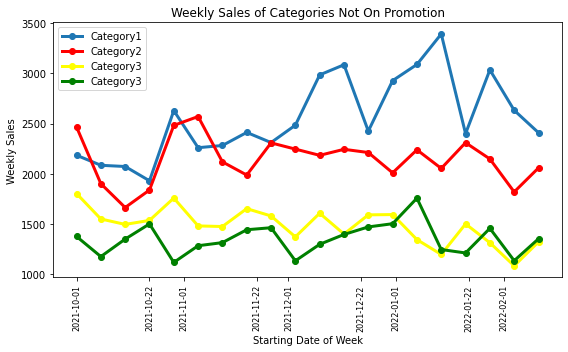

In [ ]:
plotcat(dfoutliernpcat,' Not On Promotion')

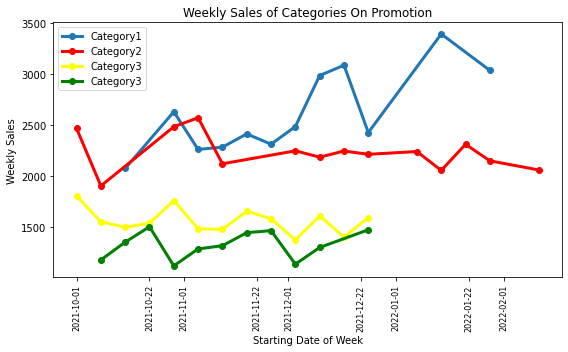

In [ ]:
plotcat(dfoutlierpcat,' On Promotion')

In [ ]:
dfp = df.loc[df['OnPromo'] == 1]
dfp = dfp.loc[:,['ItemCode','Category','OnPromo']]
dfp = dfp.drop_duplicates()
dfp.shape

(62, 3)

In [ ]:
dfp.to_csv('promocat.csv',index=False) 
files.download('promocat.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
dfp = df.loc[df['OnPromo'] == 1]
dfnp = df.loc[df['OnPromo'] == 0]
df3 = df.loc[:,['Period','Week_number','startdate','enddate','Category','CategoryWeeklySales']]

Validation Data

In [ ]:
up = files.upload()

Saving validpred.csv to validpred.csv
Saving validpromopred.csv to validpromopred.csv
Saving validnonpromopred.csv to validnonpromopred.csv


In [ ]:
promo = pd.read_csv('validpromopred.csv')
promo.head()

,CategoryCode,ItemCode,Week,OnPromo,WeeklySales,Category,startdate,enddate,Week_Number,OriginalSellingPrice,SellingPrice,PredictedSales
0,category_2,30877,w2,1,121,2,2022-02-25,2022-03-03,9,70,63.00,134.582761
1,category_2,1090258,w3,1,61,2,2022-03-04,2022-03-10,10,140,126.00,36.399246
2,category_3,1066570,w2,1,124,3,2022-02-25,2022-03-03,9,45,38.25,79.784836
3,category_1,1085749,w1,1,17,1,2022-02-18,2022-02-24,8,70,63.00,11.674455
4,category_2,50785,w3,1,72,2,2022-03-04,2022-03-10,10,65,58.50,72.000577


In [ ]:
promo

,CategoryCode,ItemCode,Week,OnPromo,WeeklySales,Category,startdate,enddate,Week_Number,OriginalSellingPrice,SellingPrice,PredictedSales
0,category_2,30877,w2,1,121,2,2022-02-25,2022-03-03,9,70,63.00,134.582761
1,category_2,1090258,w3,1,61,2,2022-03-04,2022-03-10,10,140,126.00,36.399246
2,category_3,1066570,w2,1,124,3,2022-02-25,2022-03-03,9,45,38.25,79.784836
3,category_1,1085749,w1,1,17,1,2022-02-18,2022-02-24,8,70,63.00,11.674455
4,category_2,50785,w3,1,72,2,2022-03-04,2022-03-10,10,65,58.50,72.000577
5,category_2,1101571,w4,1,17,2,2022-03-11,2022-03-17,11,150,135.00,44.391071
6,category_2,1090258,w2,1,27,2,2022-02-25,2022-03-03,9,140,126.00,36.399246
7,category_2,50785,w1,1,39,2,2022-02-18,2022-02-24,8,65,58.50,72.000577
8,category_2,64978,w2,1,22,2,2022-02-25,2022-03-03,9,250,225.00,27.350501
9,category_3,1066570,w4,1,41,3,2022-03-11,2022-03-17,11,45,38.25,79.784836


In [ ]:
promo['startdate'] = pd.to_datetime(promo['startdate'])
promo['enddate'] = pd.to_datetime(promo['enddate'])

In [ ]:
promo['ufdiff'] = promo['WeeklySales'] - promo['PredictedSales']

In [ ]:
p1 = promo.loc[promo['Category'] == 1].sort_values('startdate')

In [ ]:
p1

,CategoryCode,ItemCode,Week,OnPromo,WeeklySales,Category,startdate,enddate,Week_Number,OriginalSellingPrice,SellingPrice,PredictedSales,ufdiff
3,category_1,1085749,w1,1,17,1,2022-02-18,2022-02-24,8,70,63.0,11.674455,5.325545
16,category_1,17287,w1,1,65,1,2022-02-18,2022-02-24,8,70,63.0,21.683442,43.316558


In [ ]:
p2 = promo.loc[promo['Category'] == 2].sort_values(['ItemCode','startdate'])
p2

,CategoryCode,ItemCode,Week,OnPromo,WeeklySales,Category,startdate,enddate,Week_Number,OriginalSellingPrice,SellingPrice,PredictedSales,ufdiff
0,category_2,30877,w2,1,121,2,2022-02-25,2022-03-03,9,70,63.0,134.582761,-13.582761
15,category_2,30877,w3,1,98,2,2022-03-04,2022-03-10,10,70,63.0,134.582761,-36.582761
21,category_2,40759,w4,1,105,2,2022-03-11,2022-03-17,11,280,252.0,108.713883,-3.713883
7,category_2,50785,w1,1,39,2,2022-02-18,2022-02-24,8,65,58.5,72.000577,-33.000577
14,category_2,50785,w2,1,50,2,2022-02-25,2022-03-03,9,65,58.5,72.000577,-22.000577
4,category_2,50785,w3,1,72,2,2022-03-04,2022-03-10,10,65,58.5,72.000577,-0.000577
8,category_2,64978,w2,1,22,2,2022-02-25,2022-03-03,9,250,225.0,27.350501,-5.350501
19,category_2,64978,w3,1,11,2,2022-03-04,2022-03-10,10,250,225.0,27.350501,-16.350501
17,category_2,124954,w1,1,35,2,2022-02-18,2022-02-24,8,210,157.5,44.586144,-9.586144
10,category_2,1006090,w4,1,28,2,2022-03-11,2022-03-17,11,250,225.0,28.729388,-0.729388


In [ ]:
p3 = promo.loc[promo['Category'] == 3].sort_values(['ItemCode','startdate'])
p3

,CategoryCode,ItemCode,Week,OnPromo,WeeklySales,Category,startdate,enddate,Week_Number,OriginalSellingPrice,SellingPrice,PredictedSales,ufdiff
2,category_3,1066570,w2,1,124,3,2022-02-25,2022-03-03,9,45,38.25,79.784836,44.215164
12,category_3,1066570,w3,1,54,3,2022-03-04,2022-03-10,10,45,38.25,79.784836,-25.784836
9,category_3,1066570,w4,1,41,3,2022-03-11,2022-03-17,11,45,38.25,79.784836,-38.784836


In [ ]:
p4 = promo.loc[promo['Category'] == 4].sort_values(['ItemCode','startdate'])
p4

,CategoryCode,ItemCode,Week,OnPromo,WeeklySales,Category,startdate,enddate,Week_Number,OriginalSellingPrice,SellingPrice,PredictedSales,ufdiff
20,category_4,23200,w1,1,12,4,2022-02-18,2022-02-24,8,320,288.0,36.32742,-24.32742
